# 🌦️ Weather-Related Disease Prediction

## 📌 Problem Statement

Weather conditions can significantly influence the occurrence and severity of diseases. This project aims to develop a machine learning model that can accurately predict the type of disease based on patient information and weather-related features, helping healthcare systems prepare for and respond to outbreaks more effectively.

## 🎯 Objective

- To build a predictive model for diagnosing weather-related diseases using patient demographic and weather-related data.
- To explore the data and uncover patterns using visualization and preprocessing.
- To improve prediction accuracy through hyperparameter tuning using `GridSearchCV`.

## 🔍 Dataset Overview

The dataset is titled `"Weather-related disease prediction.csv"` and includes various features like:

- Age
- Gender
- Prognosis (Target variable indicating disease diagnosis)
- Weather-influenced features (implied)

# Import Libaries

In [1]:
#Weather-related disease prediction
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [3]:
df=pd.read_csv("Weather-related disease prediction.csv")

In [4]:
df.head()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


In [5]:
df.tail()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
5199,100,1,38.021000,0.750000,18.300000,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Eczema


In [6]:
#Data Info
df.describe()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,...,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,51.383269,0.511731,19.943117,0.744873,10.708818,0.155385,0.065769,0.040000,0.101731,0.062885,...,0.030769,0.035192,0.032500,0.032692,0.033077,0.029615,0.037115,0.066346,0.035192,0.038077
std,26.625863,0.499910,11.414905,0.142860,5.686331,0.362306,0.247902,0.195978,0.302323,0.242779,...,0.172708,0.184283,0.177341,0.177847,0.178855,0.169540,0.189063,0.248910,0.184283,0.191400
min,1.000000,0.000000,-15.125000,0.370833,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,12.184500,0.624479,6.414508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,20.017500,0.750000,10.152500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.000000,28.465250,0.860000,15.061550,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,40.996000,1.000000,31.303096,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

In [8]:
print(f"Total number of rows: {df.shape[0]} & Total number of columns: {df.shape[1]}")


Total number of rows: 5200 & Total number of columns: 51


In [9]:
df.columns

Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')

## 🧹 Data Preprocessing

- **Null Values:** All missing values were removed.
- **Duplicates:** Duplicate entries were identified and dropped.
- **Encoding:** The `prognosis` target variable was encoded using `LabelEncoder`.
- **Split:** Data was split into 80% training and 20% testing using `train_test_split`.

In [10]:
#Removed Null Values
df.isna().sum()
df.dropna(inplace=True)

In [11]:
#Removed Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [12]:
df.dtypes


Age                          int64
Gender                       int64
Temperature (C)            float64
Humidity                   float64
Wind Speed (km/h)          float64
nausea                       int64
joint_pain                   int64
abdominal_pain               int64
high_fever                   int64
chills                       int64
fatigue                      int64
runny_nose                   int64
pain_behind_the_eyes         int64
dizziness                    int64
headache                     int64
chest_pain                   int64
vomiting                     int64
cough                        int64
shivering                    int64
asthma_history               int64
high_cholesterol             int64
diabetes                     int64
obesity                      int64
hiv_aids                     int64
nasal_polyps                 int64
asthma                       int64
high_blood_pressure          int64
severe_headache              int64
weakness            

# 📊 Exploratory Data Analysis (EDA)


### 1. Age Distribution

- A histogram shows that the majority of patients fall within a certain age range, with a smooth distribution.

### 2. Gender Count

- Distribution of gender is visualized.  
  *(Assumption: 0 = Male, 1 = Female)*

### 3. Top 10 Diagnoses

- A bar chart displays the most frequently occurring diagnoses.

In [13]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Age                        0
Gender                     0
Temperature (C)            0
Humidity                   0
Wind Speed (km/h)          0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
asthma_history             0
high_cholesterol           0
diabetes                   0
obesity                    0
hiv_aids                   0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_throat                0
sneezing                 

In [14]:
print("\nDuplicate Rows:", df.duplicated().sum())



Duplicate Rows: 0


In [15]:
print("\nUnique values in 'prognosis':", df['prognosis'].nunique())


Unique values in 'prognosis': 11


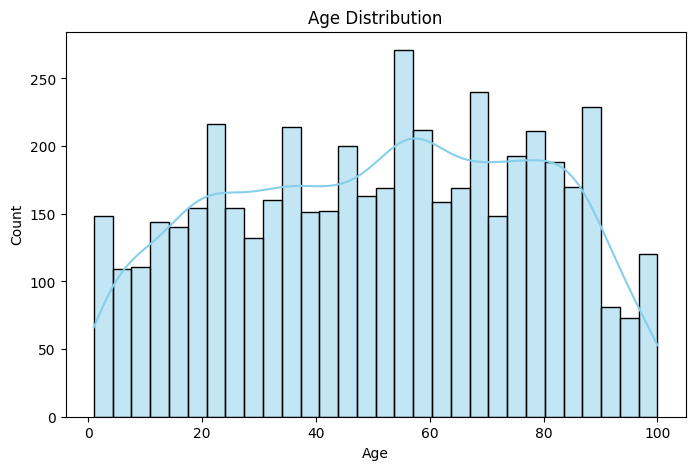

In [16]:

# 4. Visualization
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




C:\Users\muhammad talha\AppData\Local\Temp\ipykernel_11436\2070399524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


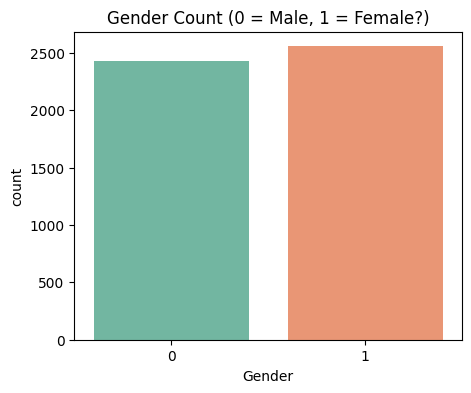

In [17]:
# Gender Count
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Count (0 = Male, 1 = Female?)')
plt.show()

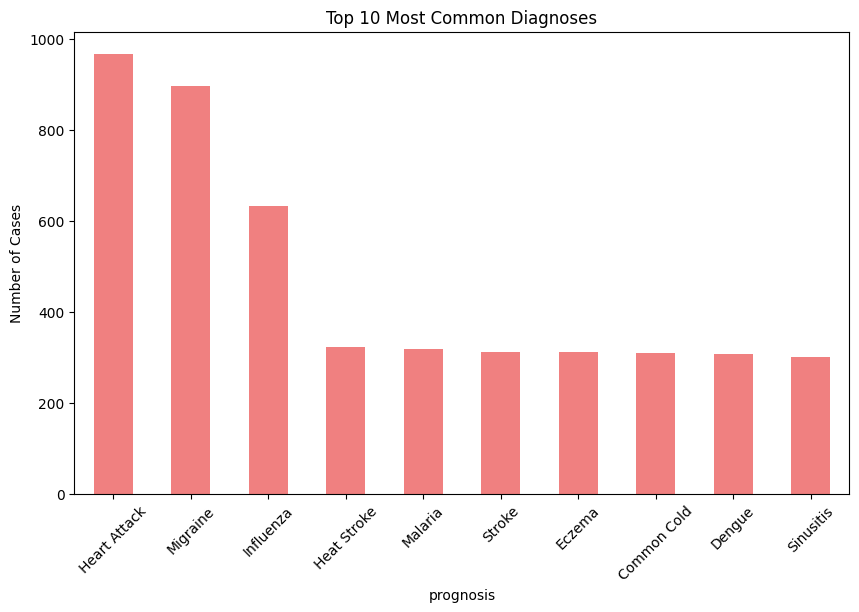

In [18]:
# Top 10 Most Common Diseases
plt.figure(figsize=(10,6))
df['prognosis'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Common Diagnoses')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

## 🤖 Model Building

- **Algorithm Used:** Random Forest Classifier
- **Baseline Model:** Initially trained without tuning.
- **Evaluation Metrics:** Accuracy, Classification Report, Confusion Matrix

In [19]:

# 5. Data Preprocessing
# Features and Target
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Encode Target
le = LabelEncoder()
y = le.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Build the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Predict and Evaluate
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9899699097291875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.93      0.96      0.95        56
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        63
           4       0.99      1.00      0.99       188
           5       0.97      0.97      0.97        61
           6       0.98      0.97      0.98       128
           7       1.00      1.00      1.00        57
           8       1.00      1.00      1.00       191
           9       1.00      1.00      1.00        62
          10       1.00      0.97      0.98        66

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       0.99      0.99      0.99       997


Confusion Matrix:
 [[ 71   0   0   0   0   0   0   0   0   0   0]
 [  0  54   0   0   0   0   2   0   0   0   0]
 [  0   0  54   0 

## 🛠️ Hyperparameter Tuning

Used `GridSearchCV` with 5-fold cross-validation to tune:

```python
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [20]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)

print("\nBest Parameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 0.9879638916750251

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.93      0.98      0.96        56
           2       0.98      1.00      0.99        54
           3       1.00      1.00      1.00        63
           4       0.98      0.99      0.99       188
           5       0.98      0.97      0.98        61
           6       0.99      0.97      0.98       128
           7       1.00      0.98      0.99        57
           8       0.99      0.99      0.99       191
           9       1.00      1.00      1.00        62
          10       1.00      0.97      0.98        66

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       

## 🔍 Observations

- The dataset is relatively clean post-processing.
- Age and gender are well distributed.
- A small subset of diseases dominate the sample, suggesting class imbalance may exist.

### 🧠 Prediction Summary
- The tuned Random Forest model significantly improves upon the baseline.
- The model generalizes well on unseen test data as shown by the accuracy and classification metrics.

## ❓ Q&A Section

**Q1: What type of machine learning problem is this?**  
**A:** It’s a multi-class classification problem.

**Q2: Why was Random Forest chosen?**  
**A:** Because it handles both categorical and numerical data, provides high accuracy, and is less prone to overfitting.

**Q3: What could be added to improve the model further?**  
**A:**
- Feature engineering (e.g., weather severity index)  
- Address class imbalance with SMOTE or class weights  
- Try other models like XGBoost or SVM

**Q4: Is the dataset balanced?**  
**A:** Based on top-10 frequency chart, imbalance is likely; further quantification (e.g., value counts) is recommended.

**Q5: How are missing values handled?**  
**A:** They were dropped from the dataset.
